In [5]:
import pandas as pd
import yfinance as yf
import datetime
import openpyxl
from datetime import datetime

In [6]:
tickers_TSC_SBRY = ['TSCO.L', 'SBRY.L']
DATA_TSC_SBRY = yf.download(tickers_TSC_SBRY, period= '1y', interval= '1h')['Close']
DATA_TSC_SBRY = DATA_TSC_SBRY.reset_index()
DATA_TSC_SBRY

[*********************100%%**********************]  2 of 2 completed


Ticker,Datetime,SBRY.L,TSCO.L
0,2023-03-21 13:00:00+00:00,261.700012,256.000000
1,2023-03-21 14:00:00+00:00,261.700012,256.399994
2,2023-03-21 15:00:00+00:00,261.899994,257.000000
3,2023-03-21 16:00:00+00:00,262.399994,257.299988
4,2023-03-22 08:00:00+00:00,263.459991,258.440002
...,...,...,...
2262,2024-03-21 08:00:00+00:00,254.100006,290.200012
2263,2024-03-21 09:00:00+00:00,251.399994,288.000000
2264,2024-03-21 10:00:00+00:00,251.600006,287.898010
2265,2024-03-21 11:00:00+00:00,251.800003,288.399994


In [7]:
corr_matrix = DATA_TSC_SBRY.corr()['TSCO.L']
corr_matrix

Ticker
Datetime    0.655182
SBRY.L      0.323470
TSCO.L      1.000000
Name: TSCO.L, dtype: float64

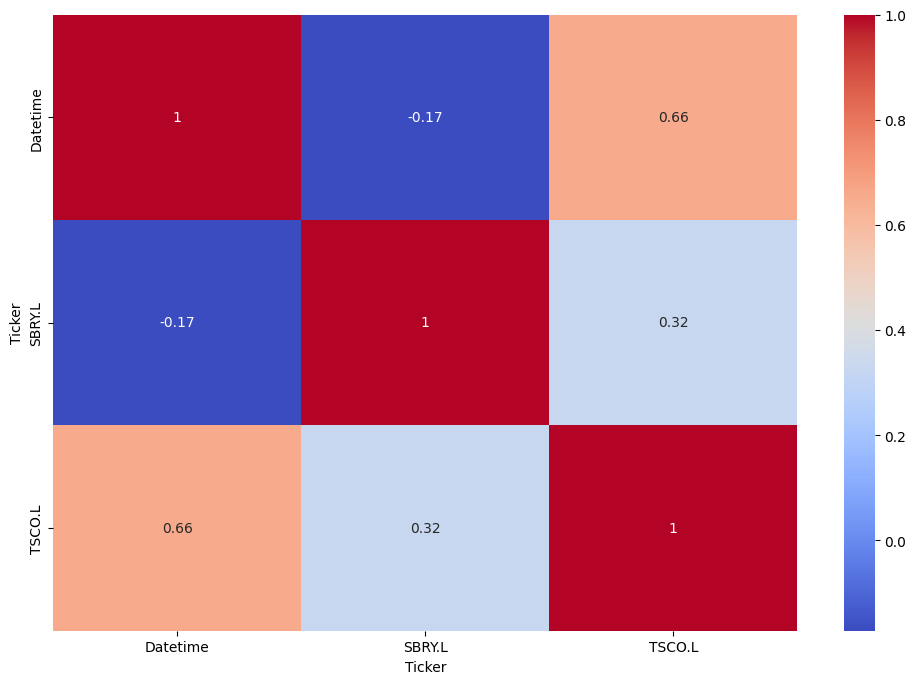

In [8]:
# Plotting the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(DATA_TSC_SBRY.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
DATA_TSC_SBRY['TSCO_NORM'] = DATA_TSC_SBRY['TSCO.L'].multiply(1.01146243).round(4)
DATA_TSC_SBRY.head()

Ticker,Datetime,SBRY.L,TSCO.L,TSCO_NORM
0,2023-03-21 13:00:00+00:00,261.700012,256.000000,258.9344
1,2023-03-21 14:00:00+00:00,261.700012,256.399994,259.3390
2,2023-03-21 15:00:00+00:00,261.899994,257.000000,259.9458
3,2023-03-21 16:00:00+00:00,262.399994,257.299988,260.2493
4,2023-03-22 08:00:00+00:00,263.459991,258.440002,261.4024


In [10]:
DATA_TSC_SBRY['RACIO'] = ((DATA_TSC_SBRY['TSCO_NORM'] - DATA_TSC_SBRY['TSCO.L']) / (DATA_TSC_SBRY['TSCO_NORM'] + DATA_TSC_SBRY['SBRY.L'])).multiply(100).round(3)
DATA_TSC_SBRY.head()

Ticker,Datetime,SBRY.L,TSCO.L,TSCO_NORM,RACIO
0,2023-03-21 13:00:00+00:00,261.700012,256.000000,258.9344,0.564
1,2023-03-21 14:00:00+00:00,261.700012,256.399994,259.3390,0.564
2,2023-03-21 15:00:00+00:00,261.899994,257.000000,259.9458,0.564
3,2023-03-21 16:00:00+00:00,262.399994,257.299988,260.2493,0.564
4,2023-03-22 08:00:00+00:00,263.459991,258.440002,261.4024,0.564


In [11]:
DATA_TSC_SBRY['Date_time'] = DATA_TSC_SBRY['Datetime'] + pd.Timedelta(hours=5)
DATA_TSC_SBRY=DATA_TSC_SBRY.drop(['Datetime'], axis=1)
DATA_TSC_SBRY['Date_time'] = DATA_TSC_SBRY['Date_time'].dt.tz_localize(None)
DATA_TSC_SBRY=DATA_TSC_SBRY[['Date_time', 'TSCO.L', 'SBRY.L', 'TSCO_NORM', 'RACIO']]

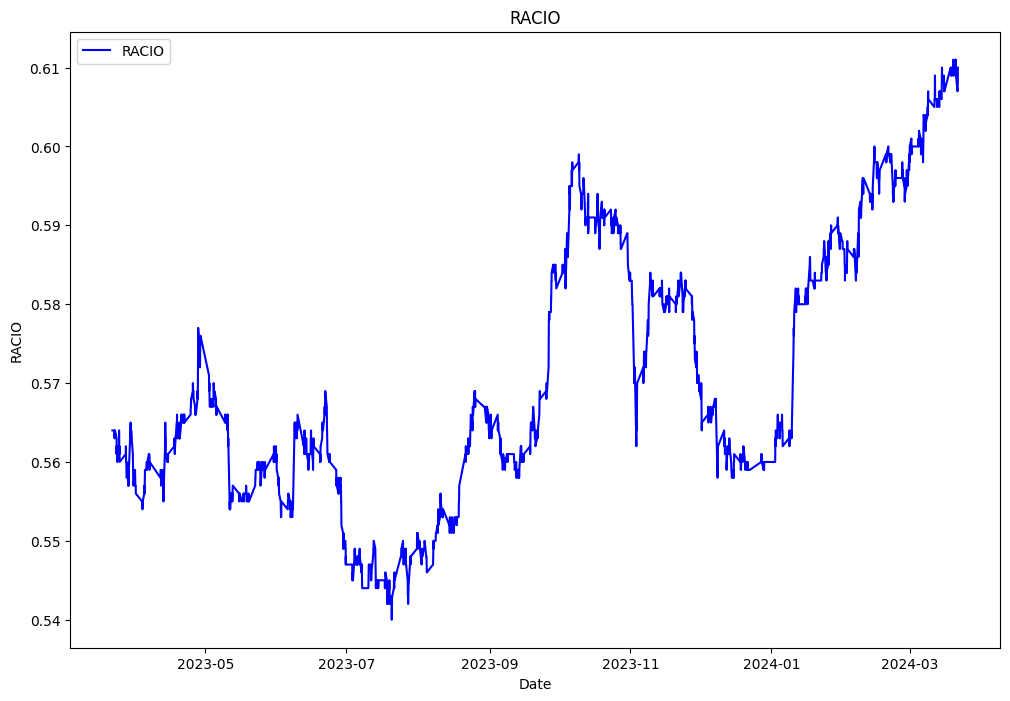

In [12]:
# Plotting the Ratio
plt.figure(figsize=(12, 8))
plt.plot(DATA_TSC_SBRY['Date_time'], DATA_TSC_SBRY['RACIO'], label='RACIO', color='blue')
plt.title('RACIO')
plt.xlabel('Date')
plt.ylabel('RACIO')
plt.legend(loc='upper left')
plt.show()

In [16]:
# import openpyxl
# readerDJ_N_values = pd.read_excel('T_S.xlsx', sheet_name='DATA2')
# writer = pd.ExcelWriter('T_S.xlsx', engine='openpyxl', mode='a', if_sheet_exists="overlay")
# DATA_TSC_SBRY.to_excel(writer, index=False, header=False, sheet_name="DATA2",
# startrow=len(readerDJ_N_values))
# writer.close()

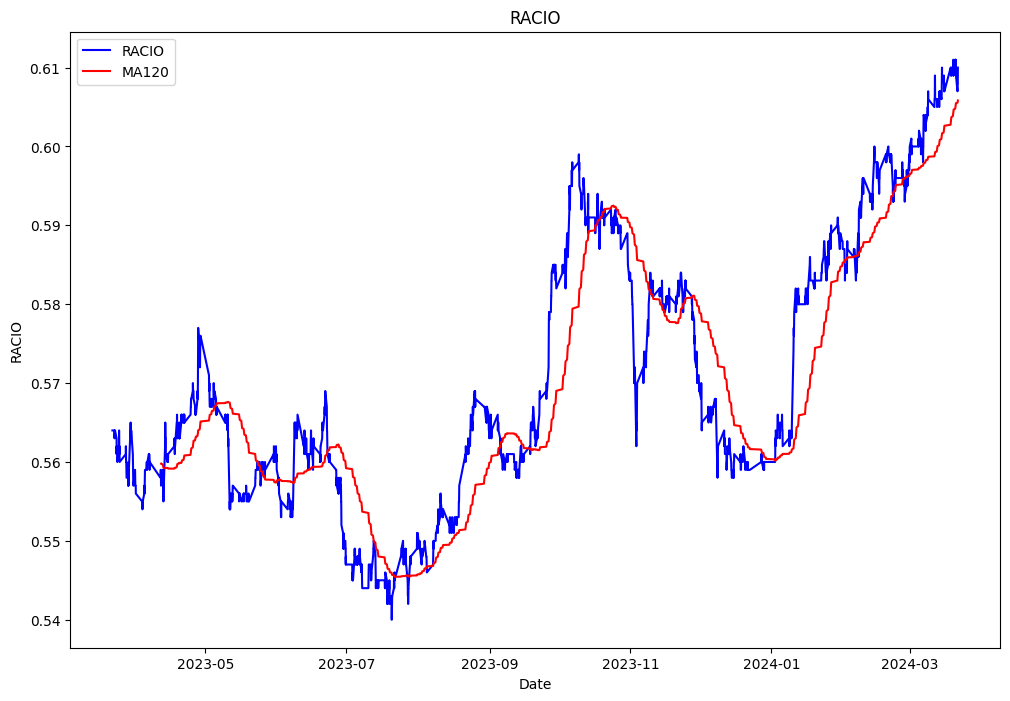

In [18]:
# calculation and plotting moving average of 100 positions 
DATA_TSC_SBRY['MA120'] = DATA_TSC_SBRY['RACIO'].rolling(window=120).mean()
plt.figure(figsize=(12, 8))
plt.plot(DATA_TSC_SBRY['Date_time'], DATA_TSC_SBRY['RACIO'], label='RACIO', color='blue')
plt.plot(DATA_TSC_SBRY['Date_time'], DATA_TSC_SBRY['MA120'], label='MA120', color='red')
plt.title('RACIO')
plt.xlabel('Date')
plt.ylabel('RACIO')
plt.legend(loc='upper left')
plt.show()
